# Linear Regression - Bike-Sharing System Assignment

### Importing Requried python Libraries

In [1749]:
import pandas as pa
import numpy as ny
import matplotlib.pyplot as pt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Data Sourcing

### Loading and Understanding the Dataset

In [1750]:
# Reading csv file
Bike_Dataset = pa.read_csv("day.csv")

### List Total Number of rows and columns in the dataset

In [1751]:
Bike_Dataset.info()

Bike_Dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(730, 16)

### Examine the Data Visually

In [1752]:
Bike_Dataset.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [1753]:
Bike_Dataset.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [1754]:
Bike_Dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning & Preparation

### Checking null Values

In [1755]:
Bike_Dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping Unwanted Columns

###### Dropping "instant" as its just the index for each row
###### Dropping "dteday" as its not useful, which can be observed with the help of yr and mnth column
###### Dropping "casual" and "registered" as its not much useful, column "cnt" has the sum of both column

In [1756]:
Bike_Dataset.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


### Converting Numerical Values of few columns to Categorical Value for better readability and analysis

In [1757]:
Bike_Dataset.season = Bike_Dataset.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
Bike_Dataset.weathersit = Bike_Dataset.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})
Bike_Dataset.weekday  = Bike_Dataset.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
Bike_Dataset.mnth = Bike_Dataset.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

### Renaming few columns for better readability

In [1758]:
Bike_Dataset.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

### Displaying Dataset after column Drop & Categorical Value Converstion

In [1759]:
Bike_Dataset.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thu,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Fri,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sat,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


## Data Visualization

### visualizing Numerical Variables with continuous & Discrete value and Checking for outliers

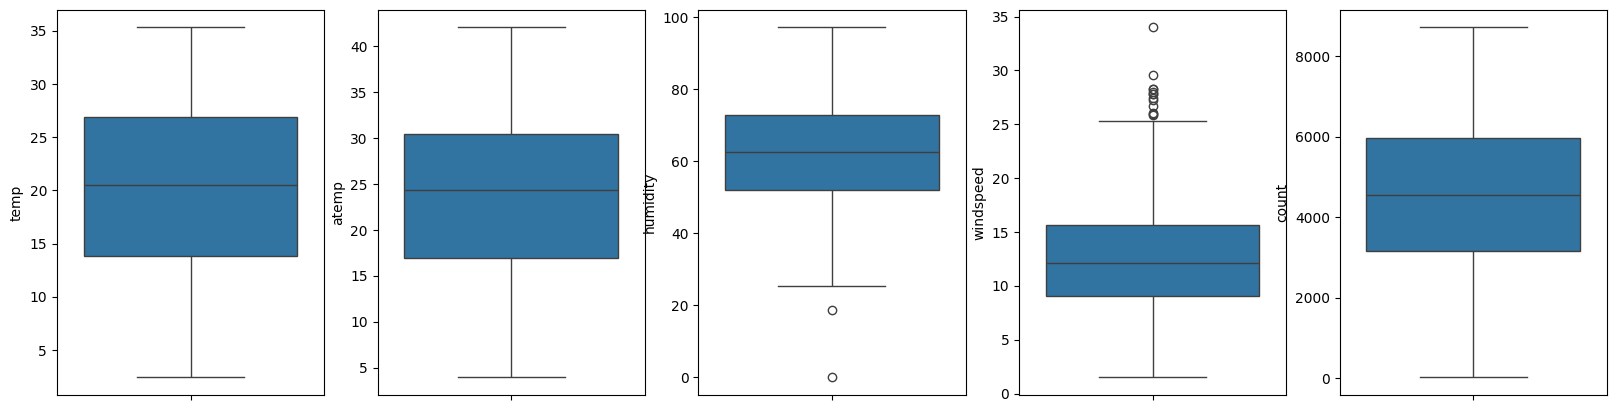

In [1760]:
# Draw box plots
Columns = ['temp', 'atemp', 'humidity', 'windspeed','count']
pt.figure(figsize=(20,5))

i = 1
for col in Columns:
    pt.subplot(1,5,i)
    sb.boxplot(y=col, data=Bike_Dataset)
    i+=1

#### Based on the plot analysis, the outliers appear to be acceptable. Therefore, we can proceed with using the dataset.

### visualizing All Numerical Variables

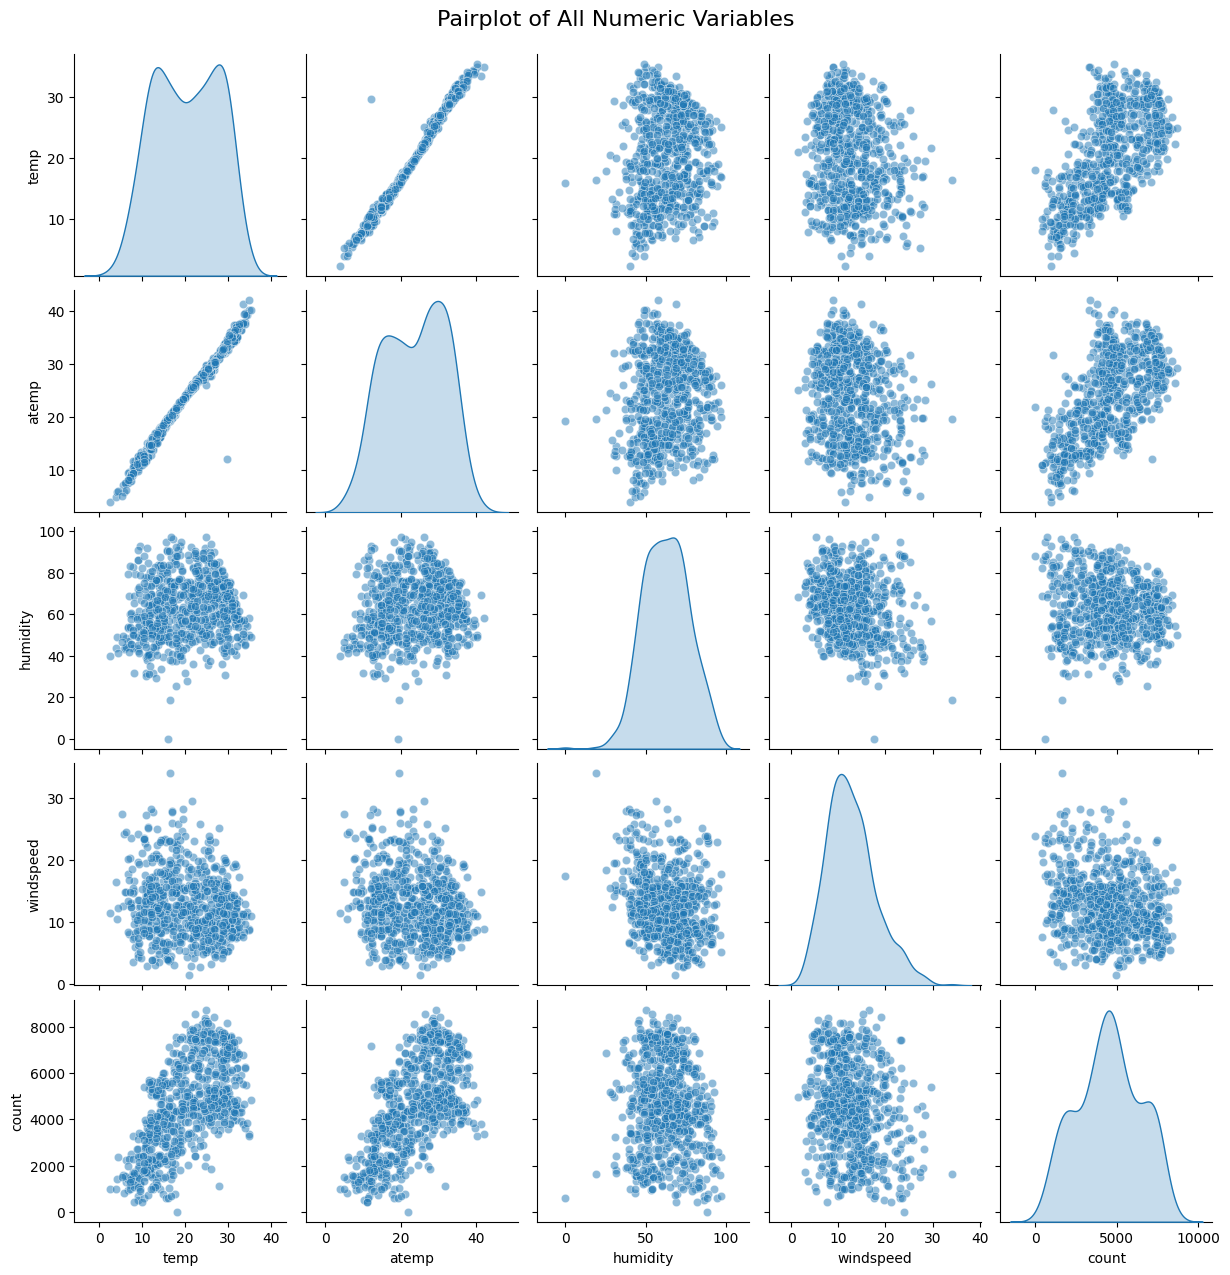

In [1761]:
numeric_Variable_data = Bike_Dataset[['temp', 'atemp', 'humidity','windspeed','count']]
# Set a custom color palette
custom_palette = sb.color_palette("magma", as_cmap=True)
# Visualizing data using Pairplot with increased data points
sb.pairplot(numeric_Variable_data, height=2.5, palette=custom_palette, markers='o', diag_kind='kde', plot_kws={'alpha': 0.5})
pt.suptitle('Pairplot of All Numeric Variables', y=1.02, size=16)
pt.show()

### Visualizing Categorical Variables 

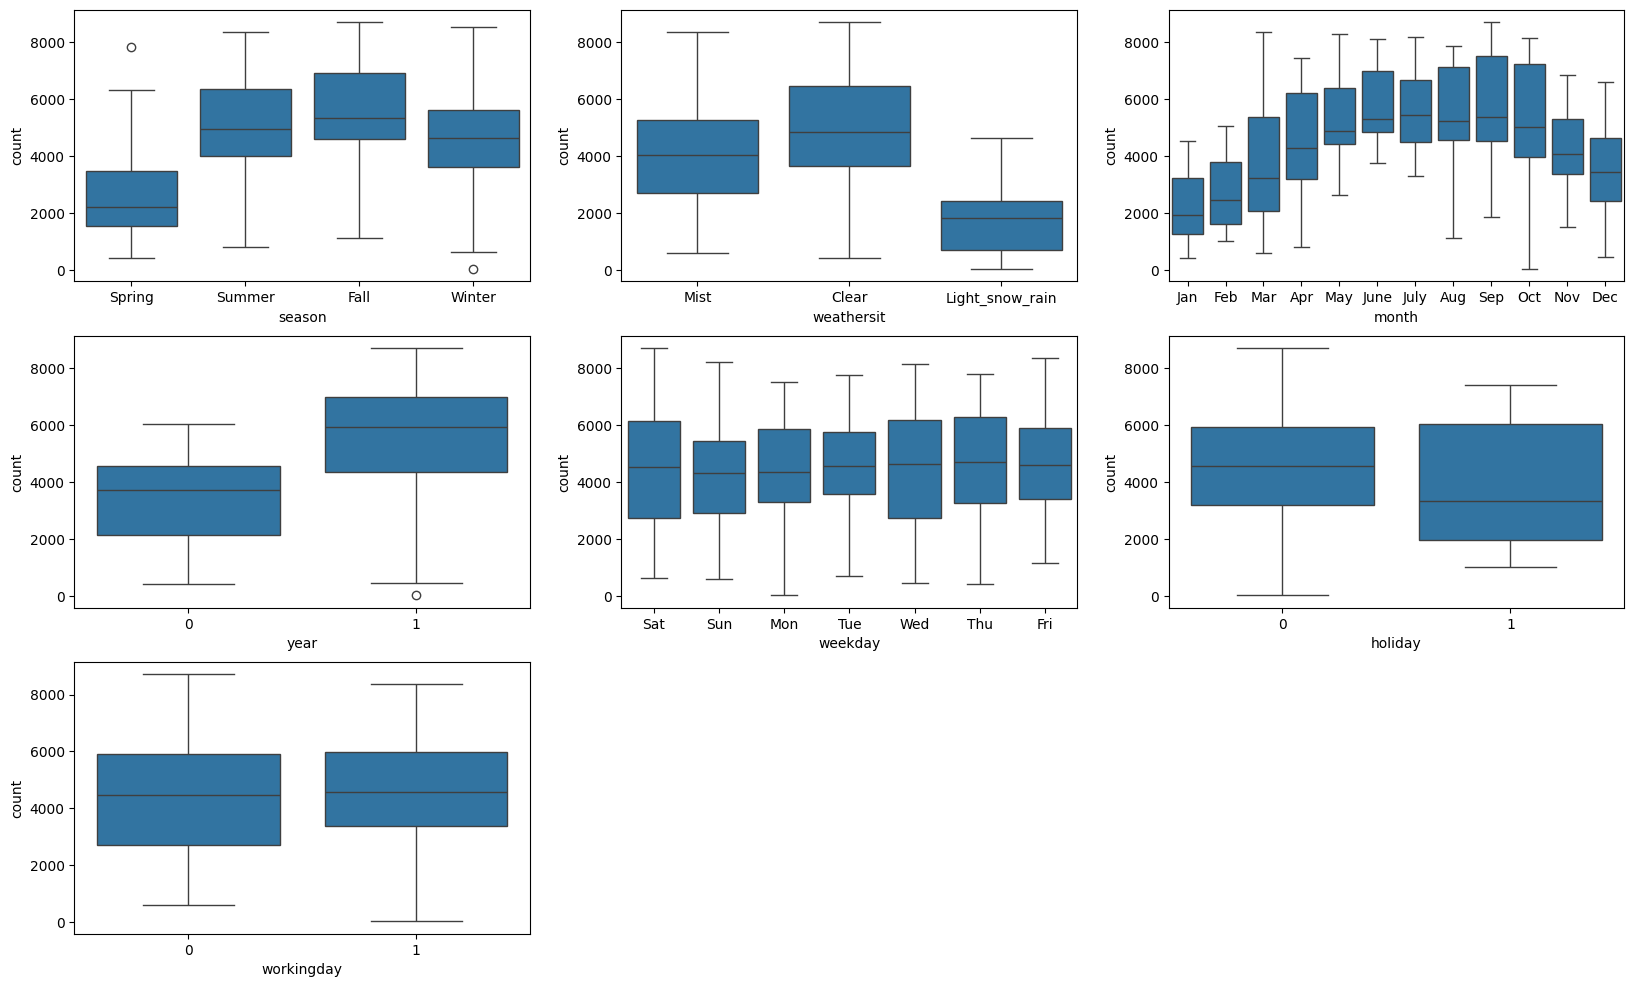

In [1762]:
pt.figure(figsize=(20, 12))
pt.subplot(3,3,1)
sb.boxplot(x = 'season', y = 'count', data = Bike_Dataset)
pt.subplot(3,3,2)
sb.boxplot(x = 'weathersit', y = 'count', data = Bike_Dataset)
pt.subplot(3,3,3)
sb.boxplot(x = 'month', y = 'count', data = Bike_Dataset)
pt.subplot(3,3,4)
sb.boxplot(x = 'year', y = 'count', data = Bike_Dataset)
pt.subplot(3,3,5)
sb.boxplot(x = 'weekday', y = 'count', data = Bike_Dataset)
pt.subplot(3,3,6)
sb.boxplot(x = 'holiday', y = 'count', data = Bike_Dataset)
pt.subplot(3,3,7)
sb.boxplot(x = 'workingday', y = 'count', data = Bike_Dataset)
pt.show()

### Based on the observations from the data plots, here's a summary of the insights regarding bike rental demand:

##### Seasonal Influence: The demand for rental bikes is highest during the fall season.
##### Monthly Trends: There is an increasing trend in bike rental demand from the beginning of the year until June, with September witnessing the peak demand. After September, the demand starts to decrease.
##### Day of the Week Impact: During weekdays and working days, there is no significant variation in bike rental demand, suggesting a consistent usage pattern regardless of the day.
##### Weather Conditions: Clear weather conditions lead to the highest demand for bike rentals, indicating that pleasant and moderate weather is favorable for biking.
##### Holiday Effect: The demand for bike rentals decreases on holidays, showing a clear deviation from regular days.
##### Yearly Growth: There is an observed growth in the demand for bike rentals in the subsequent year, indicating an overall increasing trend in bike usage over time.

### Examining the correlation coefficients to identify variables that have a strong correlation

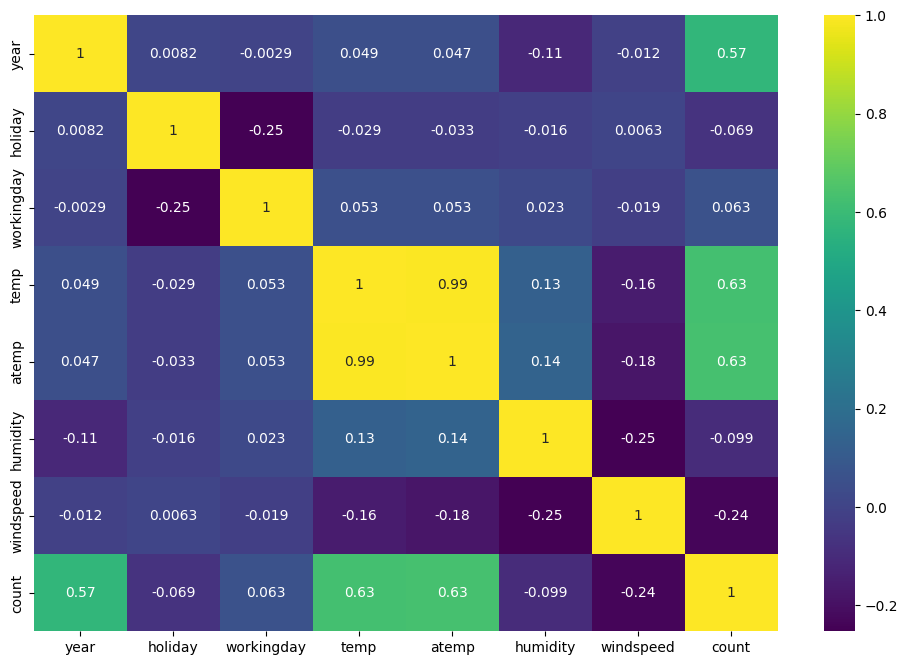

In [1763]:
pt.figure(figsize = (12, 8))
sb.heatmap(Bike_Dataset[['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity','windspeed', 'count']].corr(), annot = True, cmap="viridis")
pt.show()

### Generating Placeholder Values for Each Categorical Variable

In [1764]:
Bike_Dataset = pa.get_dummies(data=Bike_Dataset,columns=["season","month","weekday","weathersit"],drop_first=True)
Bike_Dataset.head(10)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_snow_rain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,True,False,...,False,False,False,False,False,True,False,False,False,False
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,True,False,...,False,False,False,False,False,False,False,False,False,True
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,True,False,...,False,False,False,True,False,False,False,False,False,True
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,True,False,...,False,False,False,False,True,False,False,False,False,False
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,True,False,...,False,False,True,False,False,False,False,False,False,False


## Model Building

### Separating the Data into Training and Test Sets.

In [1765]:
Bike_train, Bike_test = train_test_split(Bike_Dataset, train_size = 0.7, test_size = 0.3, random_state = 77)
# Checking shape and size of training and test set
print(Bike_train.shape)
print(Bike_test.shape)

(510, 30)
(219, 30)


### Normalizing Numeric Columns with MinMaxScaler


In [1766]:
scaler = MinMaxScaler()
num_var = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
# Adjusting scales of numeric variables
Bike_train[num_var] = scaler.fit_transform(Bike_train[num_var])
Bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_snow_rain,weathersit_Mist
60,0,0,1,0.343747,0.316347,0.463288,0.662430,0.205602,True,False,...,False,False,False,False,False,False,False,True,False,False
58,0,0,1,0.433803,0.421419,0.903080,0.616622,0.122540,True,False,...,False,False,True,False,False,False,False,False,False,True
272,0,0,1,0.629300,0.611372,0.667239,0.406575,0.575999,False,False,...,False,True,False,False,False,False,False,False,False,False
565,1,0,1,0.755981,0.700889,0.869901,0.412866,0.656646,False,False,...,False,False,False,False,False,False,False,False,False,True
378,1,0,0,0.150609,0.136537,0.471447,0.357877,0.248944,True,False,...,False,False,False,True,False,False,False,False,False,False


### Examining the correlation coefficients to identify which variables are highly correlated

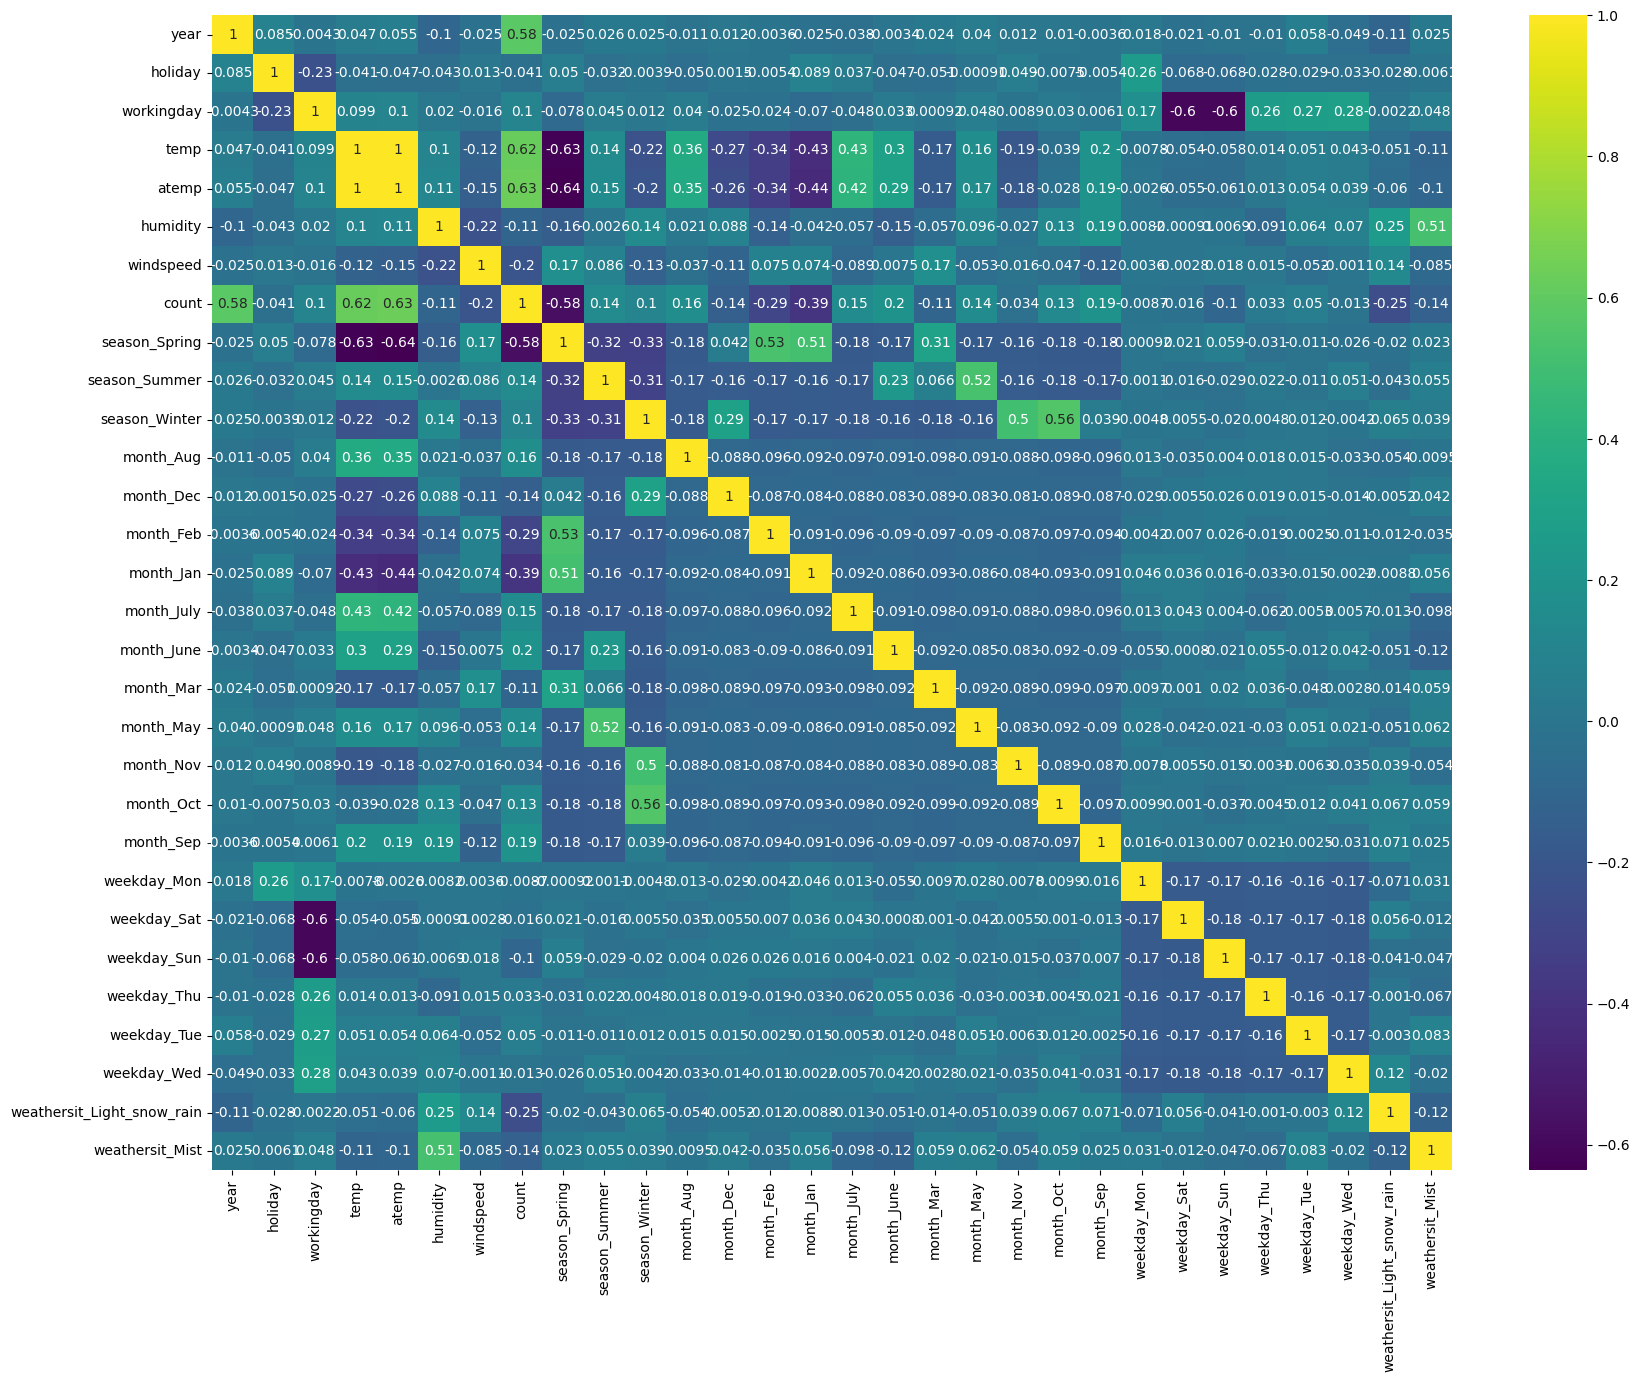

In [1767]:
pt.figure(figsize = (20, 15))
sb.heatmap(Bike_train.corr(), annot = True, cmap="viridis")
pt.show()

### Build model using RFE

In [1768]:
# Building the Linear Model
Bike_train.describe()
y_train = Bike_train.pop('count')
X_train = Bike_train
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1769]:
#Columns Chosen by Recursive Feature Elimination (RFE) and Their Corresponding Weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 13),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 15),
 ('season_Winter', True, 1),
 ('month_Aug', False, 14),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', False, 4),
 ('month_June', False, 6),
 ('month_Mar', False, 7),
 ('month_May', False, 5),
 ('month_Nov', True, 1),
 ('month_Oct', False, 9),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_Light_snow_rain', True, 1),
 ('weathersit_Mist', False, 3)]

In [1770]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Nov',
       'month_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light_snow_rain'],
      dtype='object')


In [1771]:
# Selecting Variables from the Column List Using Recursive Feature Elimination (RFE)

X_train.columns[~rfe.support_]

Index(['temp', 'season_Summer', 'month_Aug', 'month_Feb', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist'],
      dtype='object')

In [1772]:
# Common function to calculate VIF of variables

def calculateVIF(df):
    vif = pa.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1773]:
# dataset with RFE selected variables
X_train_rfe = X_train[col]
print(X_train_rfe)

     year  holiday  workingday     atemp  humidity  windspeed  season_Spring  \
60      0        0           1  0.316347  0.463288   0.662430           True   
58      0        0           1  0.421419  0.903080   0.616622           True   
272     0        0           1  0.611372  0.667239   0.406575          False   
565     1        0           1  0.700889  0.869901   0.412866          False   
378     1        0           0  0.136537  0.471447   0.357877           True   
..    ...      ...         ...       ...       ...        ...            ...   
664     1        0           0  0.572392  0.741949   0.480327          False   
293     0        0           1  0.452237  0.591670   0.444240          False   
235     0        0           1  0.724079  0.623443   0.524289          False   
596     1        0           1  0.678498  0.756548   0.213479          False   
607     1        0           1  0.801141  0.605410   0.310800          False   

     season_Winter  month_Dec  month_Ja

In [1774]:
# calculate VIF
print(X_train_rfe.dtypes)
print(X_train_rfe.isna().sum())
print(ny.isinf(X_train_rfe).sum())
X_train_rfe = X_train_rfe.astype(float)
calculateVIF(X_train_rfe)

year                            int64
holiday                         int64
workingday                      int64
atemp                         float64
humidity                      float64
windspeed                     float64
season_Spring                    bool
season_Winter                    bool
month_Dec                        bool
month_Jan                        bool
month_Nov                        bool
month_Sep                        bool
weekday_Sat                      bool
weekday_Sun                      bool
weathersit_Light_snow_rain       bool
dtype: object
year                          0
holiday                       0
workingday                    0
atemp                         0
humidity                      0
windspeed                     0
season_Spring                 0
season_Winter                 0
month_Dec                     0
month_Jan                     0
month_Nov                     0
month_Sep                     0
weekday_Sat                   0


,Features,VIF
2,workingday,41.38
13,weekday_Sun,9.94
12,weekday_Sat,9.76
3,atemp,2.92
6,season_Spring,2.81
1,holiday,2.57
7,season_Winter,2.14
10,month_Nov,1.56
9,month_Jan,1.49
8,month_Dec,1.35


## Building a linear model

### Model -1 

In [1775]:
X_train_lmd_1 = sm.add_constant(X_train_rfe)
lr_mod_1 = sm.OLS(y_train,X_train_lmd_1).fit()
print(lr_mod_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.2
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          2.72e-189
Time:                        08:04:44   Log-Likelihood:                 485.35
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     495   BIC:                            -877.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### The selection criteria based on p-values and VIF (Variance Inflation Factor) could be as follows:

#### High p-value, High VIF: These variables are the least favorable, as they are both statistically insignificant (high p-value) and exhibit multicollinearity (high VIF).
#### High p-value, Low VIF: These variables should be considered for removal first, as they are statistically insignificant despite not being highly correlated with other variables.
#### Low p-value, High VIF: These variables are the second choice for removal. They are statistically significant but have issues with multicollinearity.
#### Low p-value, Low VIF: These variables are the most favorable, being both statistically significant and free from multicollinearity concerns.

In [1776]:
# Since the 'holiday' variable exhibits high p value and low VIF, it can be dropped.
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,19.66
1,workingday,17.10
2,atemp,15.10
4,windspeed,4.78
12,weekday_Sun,4.56
11,weekday_Sat,4.48
5,season_Spring,3.14
6,season_Winter,2.70
0,year,2.04
9,month_Nov,1.64


### Model - 2

In [1777]:
X_train_lmd_2 = sm.add_constant(X_train_new)
lr_mod_2 = sm.OLS(y_train,X_train_lmd_2).fit()
print(lr_mod_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.2
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          2.72e-189
Time:                        08:04:44   Log-Likelihood:                 485.35
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     495   BIC:                            -877.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1778]:
# Since the 'weekday_Sun' variable exhibits high p value and low VIF, it can be dropped.
X_train_new = X_train_new.drop(['weekday_Sun'], axis = 1)

# calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,16.13
2,atemp,12.70
1,workingday,4.57
4,windspeed,4.38
5,season_Spring,2.82
6,season_Winter,2.62
0,year,2.04
11,weekday_Sat,1.77
9,month_Nov,1.63
8,month_Jan,1.58


### Model - 3

In [1779]:
X_train_lmd_3 = sm.add_constant(X_train_new)
lr_mod_3 = sm.OLS(y_train,X_train_lmd_3).fit()
print(lr_mod_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.1
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          6.69e-190
Time:                        08:04:44   Log-Likelihood:                 484.03
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     496   BIC:                            -880.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1780]:
# Since the 'month_Jan' variable exhibits high p value and low VIF, it can be dropped.
X_train_new = X_train_new.drop(['month_Jan'], axis = 1)

# calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,15.51
2,atemp,12.12
1,workingday,4.57
4,windspeed,4.38
6,season_Winter,2.62
5,season_Spring,2.55
0,year,2.03
10,weekday_Sat,1.77
8,month_Nov,1.62
7,month_Dec,1.38


### Model - 4

In [1781]:
X_train_lmd_4 = sm.add_constant(X_train_new)
lr_mod_4 = sm.OLS(y_train,X_train_lmd_4).fit()
print(lr_mod_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.2
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          1.06e-189
Time:                        08:04:45   Log-Likelihood:                 480.75
No. Observations:                 510   AIC:                            -935.5
Df Residuals:                     497   BIC:                            -880.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1782]:
# Since the 'humidity' variable exhibits high VIF, it can be dropped.
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,5.94
1,workingday,4.40
3,windspeed,4.35
5,season_Winter,2.29
0,year,2.03
4,season_Spring,1.87
9,weekday_Sat,1.72
7,month_Nov,1.62
6,month_Dec,1.34
8,month_Sep,1.19


### Model - 5

In [1783]:
X_train_lmd_5 = sm.add_constant(X_train_new)
lr_mod_5 = sm.OLS(y_train,X_train_lmd_5).fit()
print(lr_mod_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.0
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          2.38e-177
Time:                        08:04:45   Log-Likelihood:                 448.68
No. Observations:                 510   AIC:                            -873.4
Df Residuals:                     498   BIC:                            -822.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [1784]:
# Since the 'windspeed' variable exhibits high P value, it can be dropped.
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

# calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.68
1,workingday,4.32
4,season_Winter,2.27
0,year,2.03
8,weekday_Sat,1.70
6,month_Nov,1.61
3,season_Spring,1.48
5,month_Dec,1.34
7,month_Sep,1.18
9,weathersit_Light_snow_rain,1.06


### Model - 6

In [1785]:
X_train_lmd_6 = sm.add_constant(X_train_new)
lr_mod_6 = sm.OLS(y_train,X_train_lmd_6).fit()
print(lr_mod_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.7
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          1.28e-177
Time:                        08:04:45   Log-Likelihood:                 446.50
No. Observations:                 510   AIC:                            -871.0
Df Residuals:                     499   BIC:                            -824.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### The model 'lr_mod_6' appears to be effective, as indicated by the following key points:

#### VIF Values Below 5: The Variance Inflation Factor (VIF) values for the predictors in this model have dropped below 5, suggesting that multicollinearity is no longer a significant concern.

#### Significant p-values for Predictors: All predictors in the model have significant p-values, indicating that they are statistically meaningful in the regression.

#### Strong F-Statistics: The F-statistics value is 224.7, which is well above the threshold of 1. This high value suggests that the model has a strong overall fit.

#### P-value Nearly Zero: The p-value of the model is approximately 1.28e-177, which is extremely close to zero. This further supports the statistical significance of the model.

#### In summary, 'lr_mod_6' is a robust model with low multicollinearity among predictors, statistically significant variables, and strong overall model significance.


In [1786]:
# Checking the parameters and their coefficient values
lr_mod_6.params

const                         0.104107
year                          0.252748
workingday                    0.046872
atemp                         0.470727
season_Spring                -0.127213
season_Winter                 0.095790
month_Dec                    -0.073978
month_Nov                    -0.072770
month_Sep                     0.054102
weekday_Sat                   0.060151
weathersit_Light_snow_rain   -0.267207
dtype: float64

### Analyzing the Residuals of the Training and Validation Data

In [1787]:
X_train_lmd_6

,const,year,workingday,atemp,season_Spring,season_Winter,month_Dec,month_Nov,month_Sep,weekday_Sat,weathersit_Light_snow_rain
60,1.0,0.0,1.0,0.316347,1.0,0.0,0.0,0.0,0.0,0.0,0.0
58,1.0,0.0,1.0,0.421419,1.0,0.0,0.0,0.0,0.0,0.0,0.0
272,1.0,0.0,1.0,0.611372,0.0,1.0,0.0,0.0,1.0,0.0,0.0
565,1.0,1.0,1.0,0.700889,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378,1.0,1.0,0.0,0.136537,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
664,1.0,1.0,0.0,0.572392,0.0,1.0,0.0,0.0,0.0,1.0,0.0
293,1.0,0.0,1.0,0.452237,0.0,1.0,0.0,0.0,0.0,0.0,0.0
235,1.0,0.0,1.0,0.724079,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,1.0,1.0,1.0,0.678498,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1788]:
y_train_pred = lr_mod_6.predict(X_train_lmd_6)

#### Checking for Normal Distribution in Error Terms

Text(0.5, 0, 'Errors')

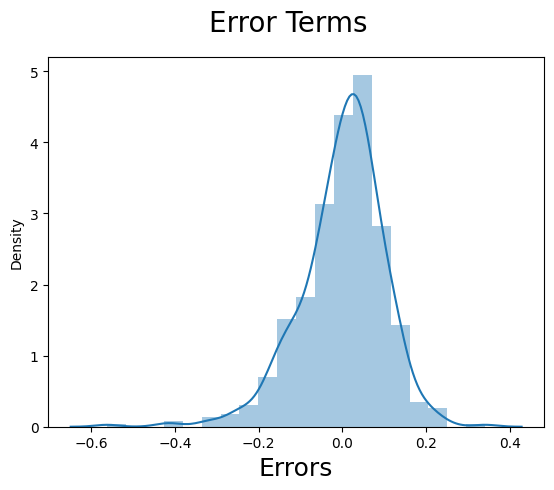

In [1789]:
# Plotting the histogram of the error terms

fig = pt.figure()
sb.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
pt.xlabel('Errors', fontsize = 18)


Error Terms follows a Normal Distribution Pattern

#### Multicollinearity Analysis

In [1790]:
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.68
1,workingday,4.32
4,season_Winter,2.27
0,year,2.03
8,weekday_Sat,1.70
6,month_Nov,1.61
3,season_Spring,1.48
5,month_Dec,1.34
7,month_Sep,1.18
9,weathersit_Light_snow_rain,1.06


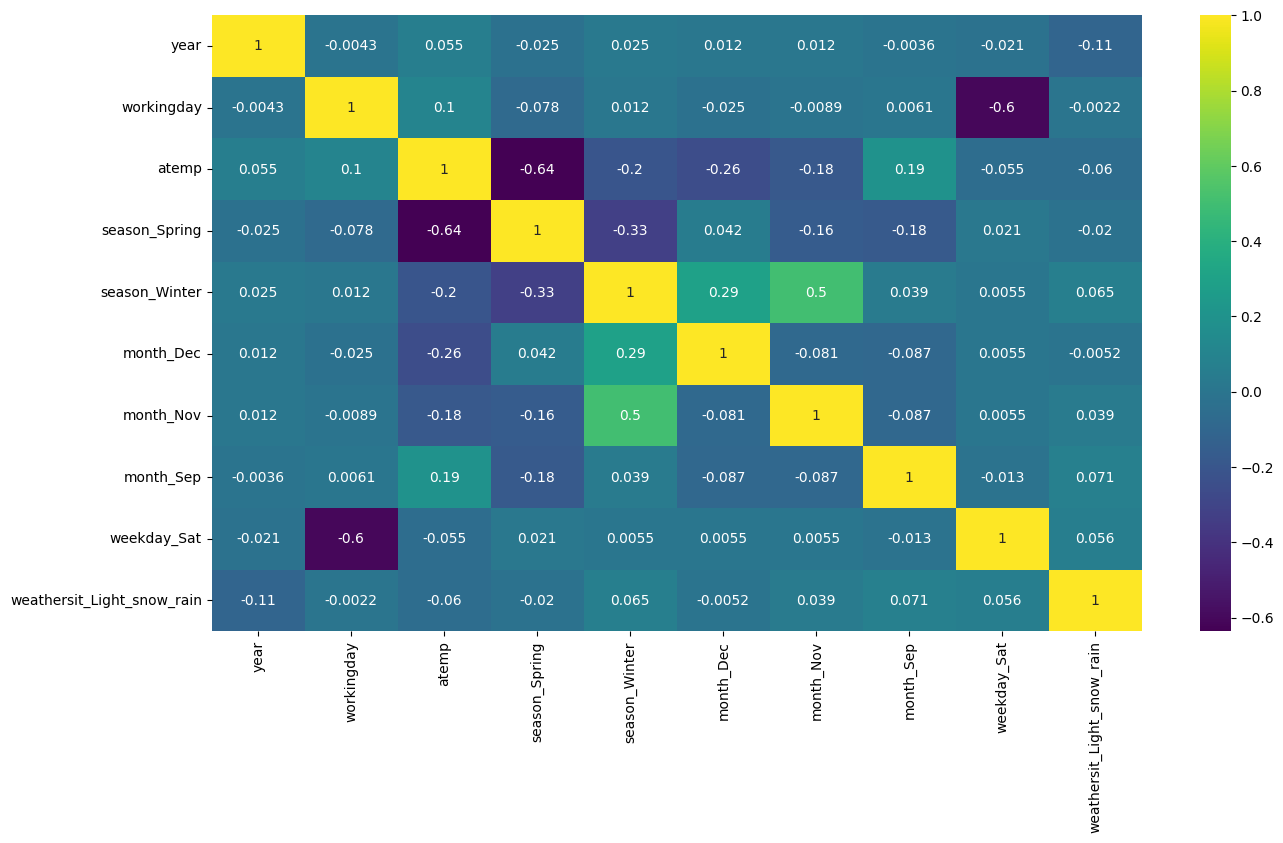

In [1791]:
pt.figure(figsize=(15,8))
sb.heatmap(X_train_new.corr(),annot = True, cmap="viridis")
pt.show()

#### The VIF values are below 5, indicating a favorable outcome, and the heatmap shows an absence of multicollinearity.

#### Linear relationship validation using CCPR plot

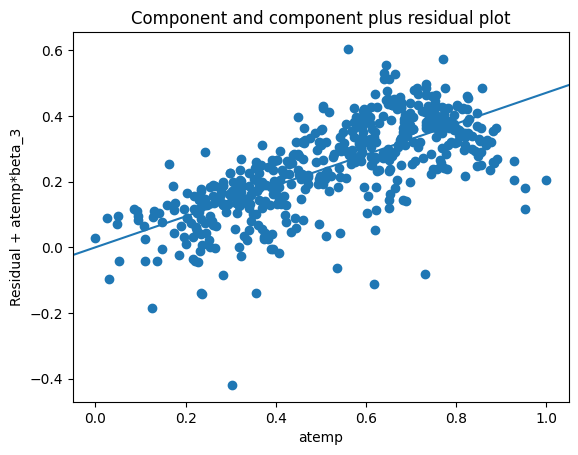

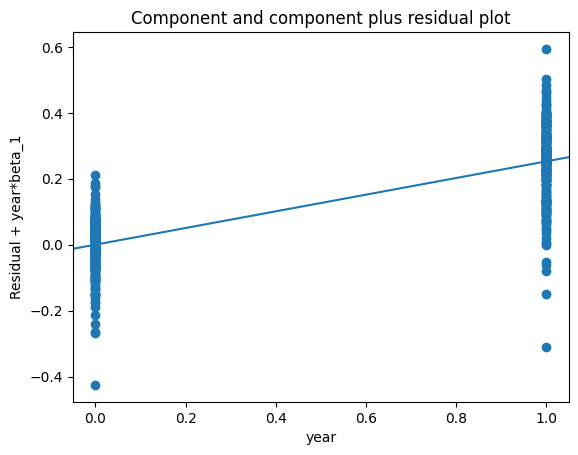

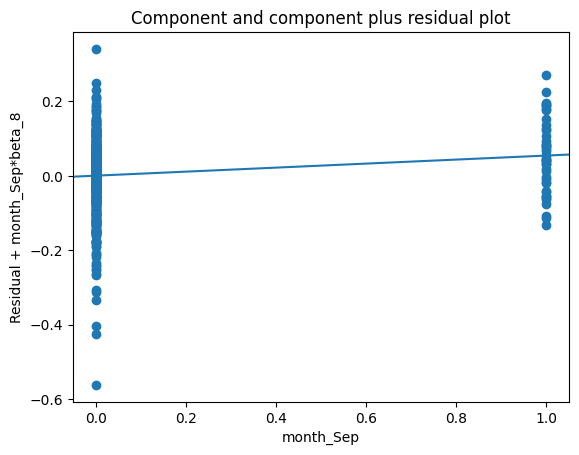

In [1792]:
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_mod_6, 'atemp')
pt.show()

sm.graphics.plot_ccpr(lr_mod_6, 'year')
pt.show()

sm.graphics.plot_ccpr(lr_mod_6, 'month_Sep')
pt.show()



#### The visualizations presented above demonstrate the presence of linearity in the data.

#### Uniform Variance of Residuals

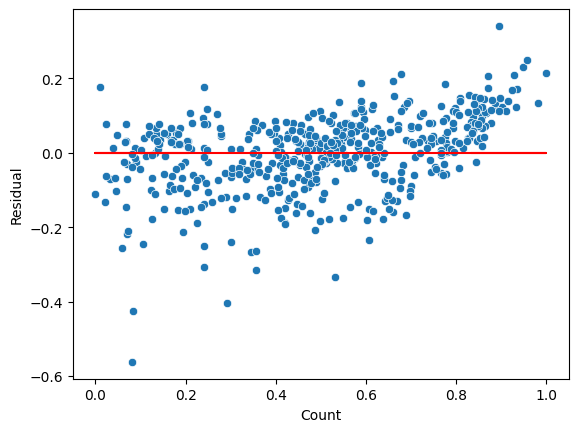

In [1793]:
y_train_pred = lr_mod_6.predict(X_train_lmd_6)
residual = y_train - y_train_pred
sb.scatterplot(x=y_train, y=residual)
pt.plot(y_train,(y_train - y_train), '-r')
pt.xlabel('Count')
pt.ylabel('Residual')
pt.show()

### The above plot of residuals does not display any discernible pattern.

### Autonomy of Residuals

#### The Durbin-Watson statistic for the final model 'lr_mod_6' is 1.957, indicating the absence of autocorrelation among the residuals.

### Making Predictions Using the Final Model

#### Having successfully fitted the model and verified the normality of error terms, it's now appropriate to proceed with making predictions using the lr_mod_6 (final version of the model).

In [1794]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
Bike_test[num_vars] = scaler.transform(Bike_test[num_vars])
Bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_snow_rain,weathersit_Mist
280,0,0,0,0.576343,0.569910,0.722627,-0.000010,0.600990,False,False,...,True,False,False,True,False,False,False,False,False,False
403,1,0,1,0.246140,0.245924,0.744955,0.222925,0.286249,True,False,...,False,False,False,False,False,False,False,True,False,True
639,1,0,1,0.662528,0.608096,0.898240,0.149100,0.508028,False,False,...,True,False,False,False,False,False,True,False,True,False
345,0,0,1,0.223295,0.250879,0.691283,0.045542,0.347579,False,False,...,False,False,True,False,False,False,False,False,False,False
94,0,0,1,0.442393,0.419099,0.661657,0.864962,0.164675,False,True,...,False,False,False,False,False,False,True,False,False,True


In [1795]:
Bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.484018,0.036530,0.712329,0.539294,0.512458,0.654221,0.363844,0.486089
std,0.500889,0.188034,0.453714,0.224395,0.212011,0.146913,0.210392,0.226070
min,0.000000,0.000000,0.000000,0.113228,0.061963,0.193646,-0.058100,-0.049378
25%,0.000000,0.000000,0.000000,0.331941,0.321318,0.559252,0.218976,0.331462
50%,0.000000,0.000000,1.000000,0.520271,0.508588,0.656076,0.323380,0.485331
75%,1.000000,0.000000,1.000000,0.736772,0.692999,0.755689,0.474068,0.654232
max,1.000000,1.000000,1.000000,0.960541,0.980934,1.002146,1.166349,0.961487


In [1796]:
y_test = Bike_test.pop('count')
X_test = Bike_test

In [1797]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test datase
X_test_lmd_6 = sm.add_constant(X_test)

In [1798]:
y_pred = lr_mod_6.predict(X_test_lmd_6)

In [1799]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7546

### Assessing the Model

#### The next step is to create a graph comparing the actual values against the predicted values to evaluate the performance of the model.

Text(0, 0.5, 'y_pred')

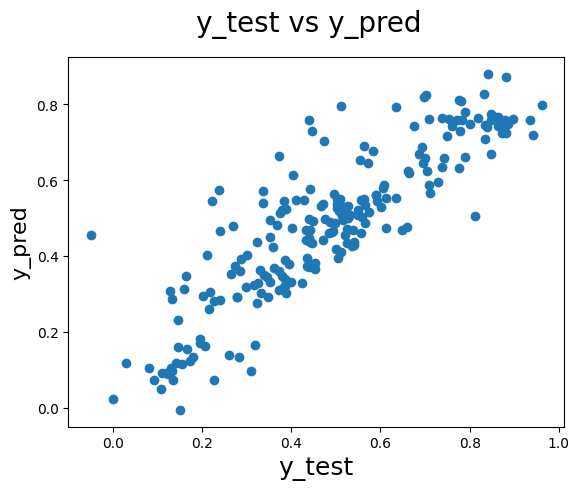

In [1800]:
# Plotting y_test and y_pred to understand the spread

fig = pt.figure()
pt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
pt.xlabel('y_test', fontsize = 18)
pt.ylabel('y_pred', fontsize = 16) 

In [1801]:
round(lr_mod_6.params,4)

const                         0.1041
year                          0.2527
workingday                    0.0469
atemp                         0.4707
season_Spring                -0.1272
season_Winter                 0.0958
month_Dec                    -0.0740
month_Nov                    -0.0728
month_Sep                     0.0541
weekday_Sat                   0.0602
weathersit_Light_snow_rain   -0.2672
dtype: float64

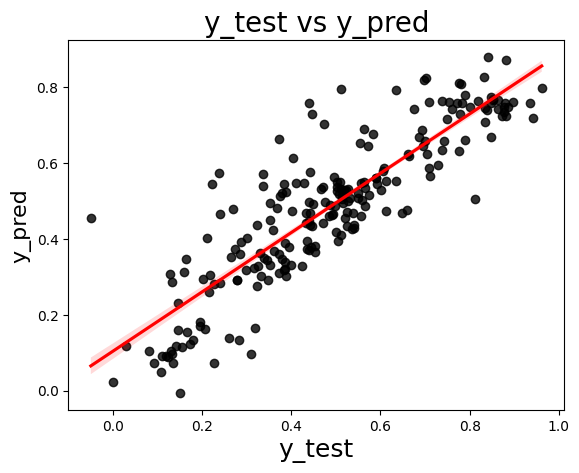

In [1802]:
# Visualizing the fit on the test data
# plotting a Regression plot
y_pred = y_pred.astype(float)
pt.figure()
sb.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "black"}, line_kws={"color": "red"})
pt.title('y_test vs y_pred', fontsize=20)
pt.xlabel('y_test', fontsize=18)
pt.ylabel('y_pred', fontsize=16)
pt.show()